# Regresion Logistica

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #para que no salgan mensajes que no nos interesan

from pandas import Series,DataFrame


import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

# Regresion logistica sobre cancer

In [3]:
address='cancer.csv'
cancer=pd.read_csv(address)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer3=cancer[['radius_mean','texture_mean','fractal_dimension_worst']]
cancer3.columns=['RadioPromedio','TexturaPromedio','DimFractal']
cancer3.head()

,RadioPromedio,TexturaPromedio,DimFractal
0,17.99,10.38,0.11890
1,20.57,17.77,0.08902
2,19.69,21.25,0.08758
3,11.42,20.38,0.17300
4,20.29,14.34,0.07678


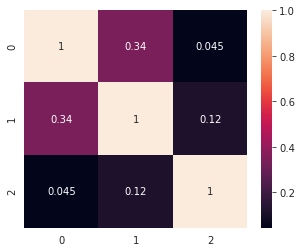

In [5]:
cancer_data= cancer3.iloc[:,:].values
cancer_data_names=['RadioPromedio','textura','DimFractal']


y=cancer.iloc[:,1].values

correlacion,pvalues = spearmanr(cancer_data)
sb.heatmap(correlacion,annot = True) #correlacion de spearman sale igual que usar .corr(method="spearman")

# Matriz de correlacion

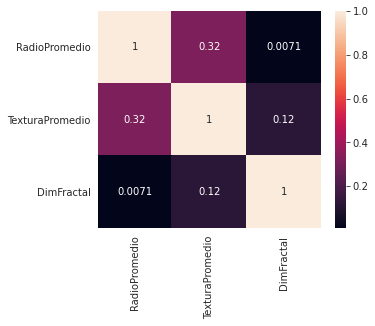

In [6]:
tc = cancer3.corr(method="pearson")
sb.heatmap(tc, annot = True)

# Checando valores faltantes 

In [7]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Checar si el objetivo es binario u ordinal

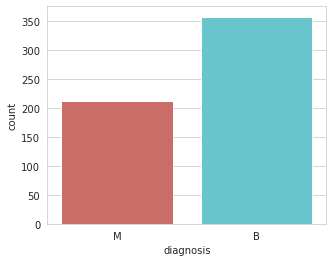

In [8]:
sb.countplot(x='diagnosis',data=cancer,palette='hls')

# Checar el tamaño de nuestro conjunto de datos es suficiente

In [9]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
X=scale(cancer_data) 
X

array([[ 1.09706398, -2.07333501,  1.93701461],
       [ 1.82982061, -0.35363241,  0.28118999],
       [ 1.57988811,  0.45618695,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.31840916],
       [ 1.83834103,  2.33645719,  2.21963528],
       [-1.80840125,  1.22179204, -0.75120669]])

In [11]:
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X,y)
print (LogReg.score(X,y))

0.9384885764499121


In [12]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       357
           M       0.93      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



# Validacion del modelo

In [13]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [14]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle = True,random_state=seed)
cv_results = model_selection.cross_val_score(LogReg, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg) #media y desviación estandar

Logistic Regression: 0.937115 (0.034153)


In [15]:
predictions = LogReg.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9415204678362573


In [16]:
print(confusion_matrix(Y_validation, predictions))

[[112   4]
 [  6  49]]
